In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
%matplotlib inline
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Load the online news dataset
data = pd.read_csv("train.csv")
display(data.head())

In C:\Users\aashk\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\aashk\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\aashk\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\aashk\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\aashk\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0,http://mashable.com/2013/03/15/build-arduino-p...,8.0,211.0,0.629808,1.0,0.800000,6.0,3.0,0.0,...,0.100000,0.6,-0.100000,NaN,-0.100000,1.000000,0.600000,0.500000,0.600000,36700
1,1,http://mashable.com/2013/09/04/edible-bar-codes/,12.0,416.0,0.603535,1.0,0.663580,22.0,7.0,1.0,...,0.033333,1.0,-0.228621,-0.5000,-0.071429,0.000000,0.000000,0.500000,0.000000,24200
2,2,http://mashable.com/2014/06/20/non-player-char...,7.0,229.0,0.638393,1.0,0.746479,9.0,4.0,1.0,...,0.050000,1.0,-0.260833,-0.5000,-0.166667,0.000000,0.000000,0.500000,0.000000,945
3,3,http://mashable.com/2014/08/06/food-art-vine-c...,9.0,473.0,0.542373,1.0,0.752809,7.0,0.0,1.0,...,0.136364,0.7,-0.167500,-0.2500,-0.100000,0.000000,0.000000,0.500000,0.000000,844
4,4,http://mashable.com/2014/12/17/blackberry-clas...,13.0,1097.0,0.505213,1.0,0.676343,10.0,4.0,14.0,...,0.033333,1.0,-0.193182,-0.3125,-0.100000,0.383333,0.166667,0.116667,0.166667,551


In [2]:
# Get the statistics of original target attribute
popularity_raw = data[data.keys()[-1]]
popularity_raw.describe()
# Encode the label by threshold 1400
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
popular_label = pd.Series(label_encoder.fit_transform(popularity_raw>=1400))

In [3]:
popularity_raw.shape

(29733,)

In [4]:
# Get the features from dataset
features_raw = data.drop(['url',data.keys()[1],data.keys()[-1]], axis=1)
display(features_raw.head())

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0,8.0,211.0,0.629808,1.0,0.800000,6.0,3.0,0.0,0.0,...,0.413435,0.100000,0.6,-0.100000,NaN,-0.100000,1.000000,0.600000,0.500000,0.600000
1,1,12.0,416.0,0.603535,1.0,0.663580,22.0,7.0,1.0,16.0,...,0.324716,0.033333,1.0,-0.228621,-0.5000,-0.071429,0.000000,0.000000,0.500000,0.000000
2,2,7.0,229.0,0.638393,1.0,0.746479,9.0,4.0,1.0,1.0,...,0.354545,0.050000,1.0,-0.260833,-0.5000,-0.166667,0.000000,0.000000,0.500000,0.000000
3,3,9.0,473.0,0.542373,1.0,0.752809,7.0,0.0,1.0,1.0,...,0.356253,0.136364,0.7,-0.167500,-0.2500,-0.100000,0.000000,0.000000,0.500000,0.000000
4,4,13.0,1097.0,0.505213,1.0,0.676343,10.0,4.0,14.0,0.0,...,0.366255,0.033333,1.0,-0.193182,-0.3125,-0.100000,0.383333,0.166667,0.116667,0.166667


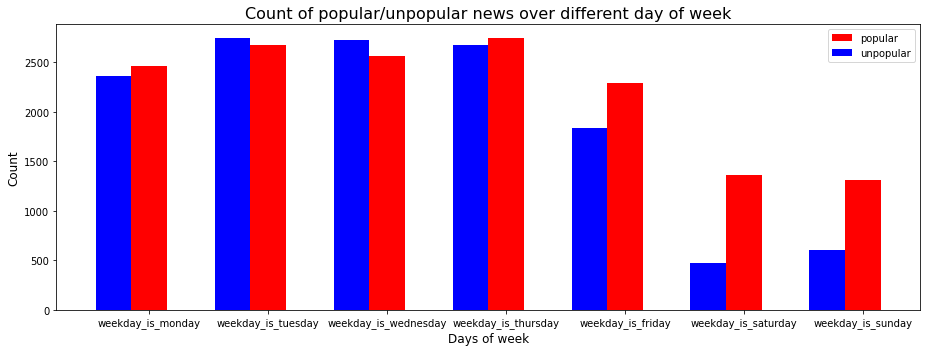

In [5]:
# Visualize the feature of different day of week
columns_day = features_raw.columns.values[30:37]
unpop=data[data['shares']<1400]
pop=data[data['shares']>=1400]
unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values

import matplotlib.pyplot as pl
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

fig = pl.figure(figsize = (13,5))
pl.title("Count of popular/unpopular news over different day of week", fontsize = 16)
pl.bar(np.arange(len(columns_day)), pop_day, width = 0.3, align="center", color = 'r', \
          label = "popular")
pl.bar(np.arange(len(columns_day)) - 0.3, unpop_day, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
pl.xticks(np.arange(len(columns_day)), columns_day)
pl.ylabel("Count", fontsize = 12)
pl.xlabel("Days of week", fontsize = 12)
    
pl.legend(loc = 'upper right')
pl.tight_layout()
pl.savefig("days.pdf")
pl.show()  

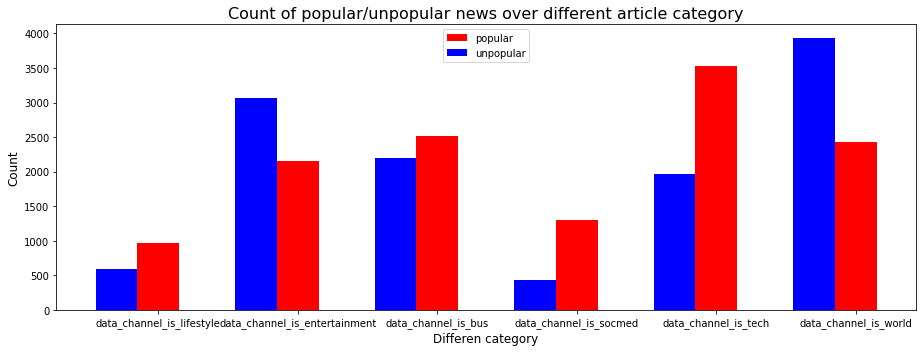

In [6]:
# Visualize the feature of different article category
columns_chan=features_raw.columns.values[12:18]
unpop_chan = unpop[columns_chan].sum().values
pop_chan = pop[columns_chan].sum().values
fig = pl.figure(figsize = (13,5))
pl.title("Count of popular/unpopular news over different article category", fontsize = 16)
pl.bar(np.arange(len(columns_chan)), pop_chan, width = 0.3, align="center", color = 'r', \
          label = "popular")
pl.bar(np.arange(len(columns_chan)) - 0.3, unpop_chan, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
pl.xticks(np.arange(len(columns_chan)), columns_chan)

pl.ylabel("Count", fontsize = 12)
pl.xlabel("Differen category", fontsize = 12)
    
pl.legend(loc = 'upper center')
pl.tight_layout()
pl.savefig("chan.pdf")
pl.show()  

In [7]:
# Normalize the numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_self_hrefs', 'num_imgs','num_videos',\
            'average_token_length','num_keywords','self_reference_min_shares','self_reference_max_shares',\
             'self_reference_avg_sharess']
features_raw[numerical] = scaler.fit_transform(data[numerical])
display(features_raw.head(n = 1))

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0,0.285714,0.0249,0.629808,1.0,0.8,0.019737,0.025862,0.0,0.0,...,0.413435,0.1,0.6,-0.1,NaN,-0.1,1.0,0.6,0.5,0.6


In [8]:
#features_raw.shape

# Handling missing values

In [9]:
features_raw.isnull().sum() * 100 / len(features_raw)

id                                0.000000
n_tokens_title                    0.000000
n_tokens_content                  0.000000
n_unique_tokens                   0.000000
n_non_stop_words                  0.000000
n_non_stop_unique_tokens          0.000000
num_hrefs                         2.730972
num_self_hrefs                   15.245687
num_imgs                         18.185181
num_videos                        1.974237
average_token_length              0.000000
num_keywords                      1.560556
data_channel_is_lifestyle         0.000000
data_channel_is_entertainment     0.000000
data_channel_is_bus               0.000000
data_channel_is_socmed            0.000000
data_channel_is_tech              0.000000
data_channel_is_world             0.000000
kw_min_min                        3.645781
kw_max_min                        1.533649
kw_avg_min                        0.282514
kw_min_max                        0.460767
kw_max_max                        5.095349
kw_avg_max 

In [10]:
features_raw= features_raw.fillna(0)

In [11]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(features_raw)
reduced_features = pca.transform(features_raw)
reduced_features = pd.DataFrame(reduced_features, columns = ['Dimension 1', 'Dimension 2'])
reduced_features_pop = reduced_features[data['shares']>=1400]
reduced_features_unpop = reduced_features[data['shares']<1400]

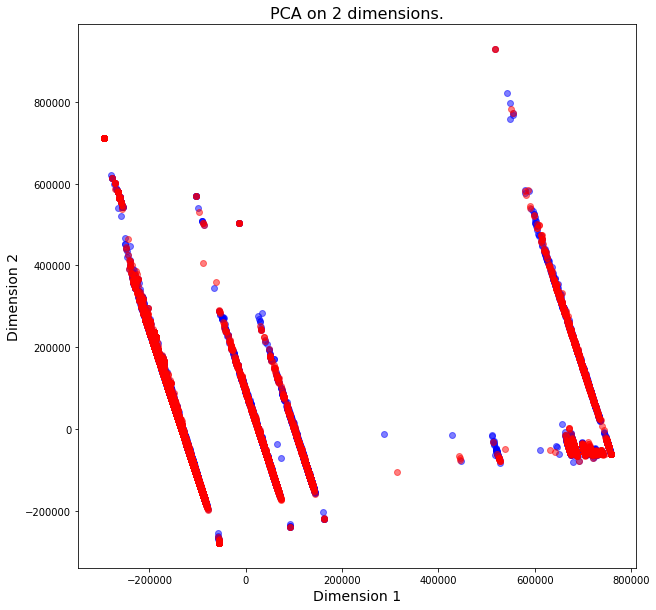

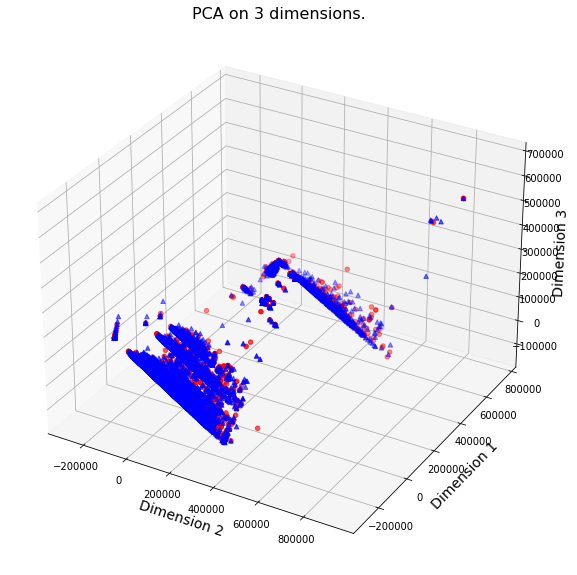

In [12]:
fig, ax = pl.subplots(figsize = (10,10))
# Scatterplot of the reduced data    
ax.scatter(x=reduced_features_pop.loc[:, 'Dimension 1'], y=reduced_features_pop.loc[:, 'Dimension 2'],\
           c='b',alpha=0.5)
ax.scatter(x=reduced_features_unpop.loc[:, 'Dimension 1'], y=reduced_features_unpop.loc[:, 'Dimension 2'],\
           c='r', alpha=0.5)
ax.set_xlabel("Dimension 1", fontsize=14)
ax.set_ylabel("Dimension 2", fontsize=14)
ax.set_title("PCA on 2 dimensions.", fontsize=16);
pl.savefig("pca2.jpg")

from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3).fit(features_raw)
reduced_features = pca.transform(features_raw)
reduced_features = pd.DataFrame(reduced_features, columns = ['Dimension 1', 'Dimension 2','Dimension 3'])
reduced_features_pop = reduced_features[data['shares']>=1400]
reduced_features_unpop = reduced_features[data['shares']<1400]
# 3D scatterplot of the reduced data 
fig = pl.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter( reduced_features_pop.loc[:, 'Dimension 2'],reduced_features_pop.loc[:, 'Dimension 1'],\
           reduced_features_pop.loc[:, 'Dimension 3'], c='b',marker='^')
ax.scatter(reduced_features_unpop.loc[:, 'Dimension 2'],reduced_features_unpop.loc[:, 'Dimension 1'],\
           reduced_features_unpop.loc[:, 'Dimension 3'], c='r')
ax.set_xlabel("Dimension 2", fontsize=14)
ax.set_ylabel("Dimension 1", fontsize=14)
ax.set_zlabel("Dimension 3", fontsize=14)
ax.set_title("PCA on 3 dimensions.", fontsize=16);
pl.savefig("pca3.jpg")

In [13]:
# Feature selection by RFECV
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

estimator = AdaBoostClassifier(random_state=0)
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(features_raw, popular_label)
selector.ranking_

estimator_LR = LogisticRegression(random_state=0)
selector_LR = RFECV(estimator_LR, step=1, cv=5)
selector_LR = selector_LR.fit(features_raw, popular_label)
selector_LR.ranking_

estimator_RF = RandomForestClassifier(random_state=0)
selector_RF = RFECV(estimator_RF, step=1, cv=5)
selector_RF = selector_RF.fit(features_raw, popular_label)
selector_RF.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

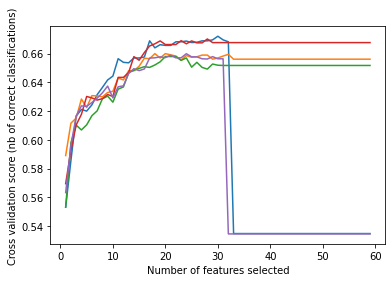

24
['n_non_stop_unique_tokens' 'num_hrefs' 'num_imgs' 'num_videos'
 'data_channel_is_entertainment' 'data_channel_is_socmed'
 'data_channel_is_tech' 'kw_min_min' 'kw_avg_min' 'kw_min_max'
 'kw_max_max' 'kw_avg_max' 'kw_min_avg' 'kw_max_avg' 'kw_avg_avg'
 'self_reference_min_shares' 'self_reference_avg_sharess'
 'weekday_is_friday' 'weekday_is_saturday' 'is_weekend' 'LDA_00' 'LDA_01'
 'LDA_02' 'global_subjectivity']


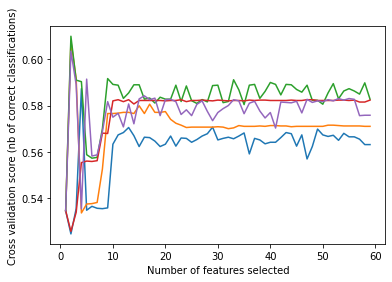

15
['id' 'data_channel_is_entertainment' 'data_channel_is_tech'
 'data_channel_is_world' 'kw_min_min' 'kw_max_min' 'kw_avg_min'
 'kw_min_max' 'kw_max_max' 'kw_avg_max' 'kw_min_avg' 'kw_max_avg'
 'kw_avg_avg' 'is_weekend' 'LDA_02']


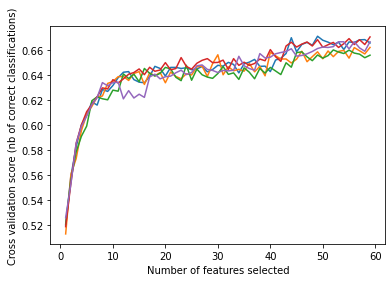

0
[]


In [14]:
# Plot the cv score vs number of features
pl.figure()
pl.xlabel("Number of features selected")
pl.ylabel("Cross validation score (nb of correct classifications)")
pl.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
pl.savefig('RFE_ADA.pdf')
pl.show()

print (features_raw.columns.values[selector.ranking_==1].shape[0])
print (features_raw.columns.values[selector.ranking_==1])
features_ADA = features_raw[features_raw.columns.values[selector.ranking_==1]]

pl.figure()
pl.xlabel("Number of features selected")
pl.ylabel("Cross validation score (nb of correct classifications)")
pl.plot(range(1, len(selector_LR.grid_scores_) + 1), selector_LR.grid_scores_)
pl.savefig('RFE_LR.pdf')
pl.show()

print (features_raw.columns.values[selector_LR.ranking_==1].shape[0])
print (features_raw.columns.values[selector_LR.ranking_==1])
features_LR = features_raw[features_raw.columns.values[selector_LR.ranking_==1]]

pl.figure()
pl.xlabel("Number of features selected")
pl.ylabel("Cross validation score (nb of correct classifications)")
pl.plot(range(1, len(selector_RF.grid_scores_) + 1), selector_RF.grid_scores_)
pl.savefig('RFE_RF.pdf')
pl.show()

print (features_raw.columns.values[selector_RF.ranking_!=1].shape[0])
print (features_raw.columns.values[selector_RF.ranking_!=1])
features_RF = features_raw[features_raw.columns.values[selector_RF.ranking_==1]]

In [15]:
# Split data into training and testing sets
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split


X_train_ADA, X_test_ADA, y_train_ADA, y_test_ADA = train_test_split(features_ADA, popular_label, test_size = 0.1, random_state = 0)

X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(features_LR, popular_label, test_size = 0.1, random_state = 0)

X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(features_RF, popular_label, test_size = 0.1, random_state = 0)

print ("Training set has {} samples".format(X_train_ADA.shape[0]))
print ("Testing set has {} samples".format(X_test_ADA.shape[0]))

Training set has 26759 samples
Testing set has 2974 samples


In [16]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time

    results['train_time'] = end-start
        
    # Get predictions on the first 4000 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:4000])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute accuracy on the first 4000 training samples
    results['acc_train'] = accuracy_score(y_train[:4000],predictions_train)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute F-score on the the first 4000 training samples
    results['f_train'] = fbeta_score(y_train[:4000],predictions_train,beta=1)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=1)
    
    # Compute AUC on the the first 4000 training samples
    results['auc_train'] = roc_auc_score(y_train[:4000],predictions_train)
        
    # Compute AUC on the test set
    results['auc_test'] = roc_auc_score(y_test,predictions_test)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print ("{} with accuracy {}, F1 {} and AUC {}.".format(learner.__class__.__name__,\
          results['acc_test'],results['f_test'], results['auc_test']))  
    # Return the results
    return results

In [17]:
import matplotlib.patches as mpatches
def evaluate(results,name):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 4, figsize = (16,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'auc_train','pred_time', 'acc_test',\
                                    'f_test', 'auc_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j/4, j%4].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j/4, j%4].set_xticks([0.45, 1.45, 2.45])
                ax[j/4, j%4].set_xticklabels(["1%", "10%", "100%"])
                ax[j/4, j%4].set_xlim((-0.1, 3.0))
    
    # Add labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[0, 3].set_ylabel("AUC")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    ax[1, 3].set_ylabel("AUC")
    ax[1, 0].set_xlabel("Training Set Size")
    ax[1, 1].set_xlabel("Training Set Size")
    ax[1, 2].set_xlabel("Training Set Size")
    ax[1, 3].set_xlabel("Training Set Size")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[0, 3].set_title("AUC on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    ax[1, 3].set_title("AUC on Training Subset")
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[0, 3].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))
    ax[1, 3].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches,  bbox_to_anchor = (-1.4, 2.54),\
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    pl.savefig(name)
    pl.tight_layout()
    pl.show()
    

In [24]:
# Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
# Initialize the three models
clf_A = AdaBoostClassifier(random_state=0)
clf_B = LogisticRegression(random_state=0,C=1.0)
clf_C = RandomForestClassifier(random_state=0)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(X_train_ADA.shape[0]*0.01)
samples_10 = int(X_train_ADA.shape[0]*0.1)
samples_100 = X_train_ADA.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if clf == clf_A:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_ADA, y_train_ADA, X_test_ADA, y_test_ADA)
        elif clf == clf_B:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_LR, y_train_LR, X_test_LR, y_test_LR)
        else:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_RF, y_train_RF, X_test_RF, y_test_RF)

# Run metrics visualization for the three supervised learning models chosen
#evaluate(results,'perf_unopt.pdf')

AdaBoostClassifier trained on 267 samples.
AdaBoostClassifier with accuracy 0.5934767989240081, F1 0.5765323992994746 and AUC 0.5994599312639791.
AdaBoostClassifier trained on 2675 samples.
AdaBoostClassifier with accuracy 0.660390047074647, F1 0.6915088576664631 and AUC 0.6565308311966978.
AdaBoostClassifier trained on 26759 samples.
AdaBoostClassifier with accuracy 0.6728312037659717, F1 0.7038051750380517 and AUC 0.6687692069899807.
LogisticRegression trained on 267 samples.
LogisticRegression with accuracy 0.570275722932078, F1 0.5577854671280278 and AUC 0.575286854690597.
LogisticRegression trained on 2675 samples.
LogisticRegression with accuracy 0.5756556825823806, F1 0.6634666666666666 and AUC 0.5597785172658338.
LogisticRegression trained on 26759 samples.
LogisticRegression with accuracy 0.5776731674512441, F1 0.6534216335540839 and AUC 0.5648709835797283.
RandomForestClassifier trained on 267 samples.
RandomForestClassifier with accuracy 0.6022192333557498, F1 0.592490527040

In [26]:
def gridsearch(clf,parameters,X_train, y_train, X_test, y_test):
    scorer = make_scorer(roc_auc_score)
    grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters
    grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
    best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
    print (clf.__class__.__name__)
    print ("Unoptimized model\n------")
    print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
    print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions,beta=1)))
    print ("AUC on testing data: {:.4f}".format(roc_auc_score(y_test, predictions)))
    print ("\nOptimized Model\n------")
    print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta=1)))
    print ("Final AUC on the testing data: {:.4f}".format(roc_auc_score(y_test, best_predictions)))

    print (best_clf)

In [28]:
# Do the grid search for hyperparameters
from sklearn.metrics import make_scorer 
from sklearn.model_selection import GridSearchCV
parameters_RF = {"n_estimators": [10,20,50,100,250,500]}
parameters_LR = {"penalty": ['l1','l2'],
              "C": [0.1,0.5,1.,2.,2.5,5]}
parameters_ADA = {"n_estimators": [100,200,300,400],
              "learning_rate": [0.1,0.5,1]}

In [29]:
# Grid search for Adaboost
gridsearch(clf_A,parameters_ADA,X_train_ADA, y_train_ADA, X_test_ADA, y_test_ADA)

AdaBoostClassifier
Unoptimized model
------
Accuracy score on testing data: 0.6728
F-score on testing data: 0.7038
AUC on testing data: 0.6688

Optimized Model
------
Final accuracy score on the testing data: 0.6735
Final F-score on the testing data: 0.7055
Final AUC on the testing data: 0.6692
AdaBoostClassifier(learning_rate=1, n_estimators=400, random_state=0)


In [30]:
# Grid search for logistic regression
gridsearch(clf_B,parameters_LR,X_train_LR, y_train_LR, X_test_LR, y_test_LR)

LogisticRegression
Unoptimized model
------
Accuracy score on testing data: 0.5777
F-score on testing data: 0.6534
AUC on testing data: 0.5649

Optimized Model
------
Final accuracy score on the testing data: 0.5649
Final F-score on the testing data: 0.6357
Final AUC on the testing data: 0.5538
LogisticRegression(C=5, random_state=0)


In [31]:
# Grid search for RF
gridsearch(clf_C,parameters_RF,X_train_RF, y_train_RF, X_test_RF, y_test_RF)

RandomForestClassifier
Unoptimized model
------
Accuracy score on testing data: 0.6641
F-score on testing data: 0.6990
AUC on testing data: 0.6592

Optimized Model
------
Final accuracy score on the testing data: 0.6661
Final F-score on the testing data: 0.7031
Final AUC on the testing data: 0.6605
RandomForestClassifier(n_estimators=500, random_state=0)


In [33]:
# Run the classifier with refined hyperparameters
clf_A = AdaBoostClassifier(random_state=0,learning_rate=0.5,n_estimators=300)
clf_B = LogisticRegression(random_state=0, C=2.5)
clf_C = RandomForestClassifier(random_state=0, n_estimators=500)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if clf == clf_A:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_ADA, y_train_ADA, X_test_ADA, y_test_ADA)
        elif clf == clf_B:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_LR, y_train_LR, X_test_LR, y_test_LR)
        else:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_RF, y_train_RF, X_test_RF, y_test_RF)

# Run metrics visualization for the three supervised learning models chosen
#evaluate(results,'perf_opt.pdf')

AdaBoostClassifier trained on 267 samples.
AdaBoostClassifier with accuracy 0.5770006724949562, F1 0.5582865168539326 and AUC 0.5830682996017675.
AdaBoostClassifier trained on 2675 samples.
AdaBoostClassifier with accuracy 0.6610625420309347, F1 0.6915544675642594 and AUC 0.6573527539868711.
AdaBoostClassifier trained on 26759 samples.
AdaBoostClassifier with accuracy 0.6741761936785474, F1 0.7055606198723792 and AUC 0.6699752695797647.
LogisticRegression trained on 267 samples.
LogisticRegression with accuracy 0.5611970410221924, F1 0.5422658716239914 and AUC 0.5671094502936738.
LogisticRegression trained on 2675 samples.
LogisticRegression with accuracy 0.5756556825823806, F1 0.6612989801395599 and AUC 0.5603622279199171.
LogisticRegression trained on 26759 samples.
LogisticRegression with accuracy 0.5655682582380632, F1 0.6354401805869074 and AUC 0.5546487734802611.
RandomForestClassifier trained on 267 samples.
RandomForestClassifier with accuracy 0.6042367182246133, F1 0.587451805

In [35]:
# Run the classifier with diferent training/testing set split ratio
X_train_ADA, X_test_ADA, y_train_ADA, y_test_ADA = train_test_split(features_ADA, popular_label, test_size = 0.15, random_state = 0)

X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(features_LR, popular_label, test_size = 0.15, random_state = 0)

X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(features_RF, popular_label, test_size = 0.15, random_state = 0)

print ("Training set has {} samples.".format(X_train_ADA.shape[0]))
print ("Testing set has {} samples.".format(X_test_ADA.shape[0]))

samples_1 = int(X_train_ADA.shape[0]*0.01)
samples_10 = int(X_train_ADA.shape[0]*0.1)
samples_100 = X_train_ADA.shape[0]

clf_A = AdaBoostClassifier(random_state=0,learning_rate=0.5,n_estimators=300)
clf_B = LogisticRegression(random_state=0, C=2.5)
clf_C = RandomForestClassifier(random_state=0, n_estimators=500)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if clf == clf_A:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_ADA, y_train_ADA, X_test_ADA, y_test_ADA)
        elif clf == clf_B:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_LR, y_train_LR, X_test_LR, y_test_LR)
        else:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_RF, y_train_RF, X_test_RF, y_test_RF)

# Run metrics visualization for the three supervised learning models chosen
#evaluate(results,'perf_opt_test.pdf')

Training set has 25273 samples.
Testing set has 4460 samples.
AdaBoostClassifier trained on 252 samples.
AdaBoostClassifier with accuracy 0.5818385650224215, F1 0.6199307112288568 and AUC 0.5777008702250197.
AdaBoostClassifier trained on 2527 samples.
AdaBoostClassifier with accuracy 0.6410313901345291, F1 0.6739971492567706 and AUC 0.6371053387013068.
AdaBoostClassifier trained on 25273 samples.
AdaBoostClassifier with accuracy 0.657847533632287, F1 0.6894586894586894 and AUC 0.6539531835625914.
LogisticRegression trained on 252 samples.
LogisticRegression with accuracy 0.5728699551569507, F1 0.6348476135710177 and AUC 0.5639627611488174.
LogisticRegression trained on 2527 samples.
LogisticRegression with accuracy 0.5663677130044843, F1 0.6570921985815603 and AUC 0.5509788794123107.
LogisticRegression trained on 25273 samples.
LogisticRegression with accuracy 0.5713004484304933, F1 0.646711012564671 and AUC 0.559411842066189.
RandomForestClassifier trained on 252 samples.
RandomForest

In [36]:
sample = pd.read_csv("sample.csv")

In [37]:
sample.head()

,id,shares
0,29733,20000
1,29734,20000
2,29735,20000
3,29736,20000
4,29737,20000


In [88]:
unseen = pd.read_csv("test.csv")

In [89]:
submission_data = unseen[submission_data].set_index('id')

submission_data.shape

(9911, 59)

In [92]:
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline(steps = [  
                            ('scaling',scaler),
                             ('pca',pca), 
                            ('model',clf_A)])

In [93]:
unseen['shares'] = pipe_lr.predict(submission_data)
output = unseen[['id','shares']]
output.head()

ValueError: X has 59 features, but MinMaxScaler is expecting 11 features as input.